### Let's try to implement a VAR Model

In [477]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.api import VAR

In [482]:
def loadPrices(fn):
    global nt, nInst
    df=pd.read_csv(fn, sep='\s+', header=None, index_col=None)
    (nt,nInst) = df.shape
    return (df.values)

pricesFile="../prices.txt"
prices = pd.DataFrame(loadPrices(pricesFile)).iloc[:,:]
returns = pd.DataFrame(prices.pct_change().dropna())
train_prices = prices.iloc[:500, :]
test_prices = prices.iloc[500:, :].reset_index(drop=True)

train_returns = returns.iloc[:500,:]
test_returns = returns.iloc[500:,:].reset_index(drop=True)

<>:3: SyntaxWarning:

invalid escape sequence '\s'

<>:3: SyntaxWarning:

invalid escape sequence '\s'

C:\Users\sng66\AppData\Local\Temp\ipykernel_27040\1403969506.py:3: SyntaxWarning:

invalid escape sequence '\s'



In [481]:
train_returns

,0,1,2,3,4,5,6,7,8,9
1,-0.003660,0.013322,0.004994,-0.001887,-0.008253,-0.002473,0.005416,-0.008790,-0.010872,0.015437
2,-0.005510,-0.006002,0.006892,-0.005356,0.004001,0.013107,-0.015082,0.003267,-0.008841,0.020903
3,-0.006860,-0.002444,0.007004,-0.000317,-0.014186,0.002448,0.014219,0.005583,-0.005786,0.007446
4,0.001594,0.004612,0.012330,-0.004436,0.002749,-0.008720,0.000000,-0.007634,0.003880,-0.017624
5,-0.000796,0.002726,0.005153,-0.013049,0.003225,0.008445,-0.021569,-0.006061,-0.005314,-0.011719
...,...,...,...,...,...,...,...,...,...,...
496,0.000887,0.007303,-0.002563,-0.010139,-0.012350,-0.008686,-0.009438,-0.001722,-0.007038,-0.005170
497,-0.001181,-0.009494,-0.001927,-0.008895,0.009965,0.000000,0.010356,0.025680,0.034874,0.002265
498,-0.002660,0.004880,-0.006865,-0.000544,-0.006191,0.003286,-0.011890,0.008969,0.007945,-0.001728
499,0.011559,-0.000520,0.014258,-0.011156,-0.004477,0.002183,0.007884,0.008333,0.010873,0.000000


,0,1,2,3,4,5,6,7,8,9
0,0.010321,-0.000101,0.003016,-0.023279,0.002528,0.001523,0.020503,0.017319,-0.016160,-0.006807
1,0.003844,0.002581,-0.010892,-0.017712,-0.009088,-0.010638,0.000229,0.007603,0.011899,0.014978
2,0.008962,0.001175,-0.030865,0.034623,-0.015482,0.008457,-0.000998,0.020161,-0.032280,-0.018708
3,-0.006801,0.012512,0.005747,0.003180,0.027088,-0.006817,0.017852,-0.037303,-0.003444,-0.011715
4,0.006674,0.013986,0.020382,0.021025,-0.006078,0.005097,-0.002215,-0.013207,-0.022540,-0.053779
...,...,...,...,...,...,...,...,...,...,...
244,0.012683,0.007033,0.003183,-0.058791,0.005889,-0.010294,-0.019386,0.015117,0.008856,-0.007263
245,-0.000314,0.011052,0.007021,0.004347,0.004575,0.010331,0.013999,-0.009368,-0.017147,0.023201
246,-0.001494,0.001792,-0.009067,0.015679,-0.001529,-0.010839,-0.036366,-0.027238,0.022845,-0.001737
247,-0.004298,-0.001570,0.002463,0.040197,-0.010690,0.011555,0.018225,0.008747,-0.010819,0.004557


In [ ]:
# Starting point: 500-day training set
history = train_returns.copy()
rolling_forecasts = []

# Loop over each step in the test set
for i in range(len(test_returns)):
    # Fit VAR on current history
    model = VAR(history)
    results = model.fit(maxlags=8, ic='aic')  # or fixed lag
    
    lag_order = results.k_ar

    # Forecast next time step (1-step ahead)
    input_data = history.values[-lag_order:]
    forecast = results.forecast(input_data, steps=1)

    # Store the forecast
    rolling_forecasts.append(forecast[0])
    print(forecast[0])
    # Append the actual next observation (from test set)
    new_obs = test_returns.iloc[i:1+i]
    history = pd.concat([history, new_obs]).reset_index(drop=True)

forecast_returns = pd.DataFrame(rolling_forecasts)
forecast_returns

c:\Users\sng66\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



[ 0.00415549 -0.00361471 -0.00401345  0.04159021 -0.02515267  0.01467833
  0.02258744  0.05260108 -0.03731328 -0.01201167 -0.02574044  0.02340056
 -0.03198289  0.00944656  0.02005537 -0.00401442  0.017352   -0.02111355
  0.01879069  0.00972915  0.01055599 -0.03571235  0.00911215  0.02175787
  0.00412814  0.01903074 -0.01457268  0.02471134  0.01608935  0.00319159
 -0.03075418  0.01184908 -0.02472848 -0.01769192  0.00354214  0.01152328
 -0.00128593  0.02381962  0.00433462 -0.01289632  0.00066752  0.02175687
  0.01460138  0.01039774 -0.00374571 -0.00640842 -0.01561682 -0.02044974
  0.01837426 -0.00145238]
[-0.00610196 -0.00438561 -0.01188403  0.00099642 -0.00537922 -0.020515
  0.02723684 -0.03694028  0.02553436 -0.01595263 -0.00733072 -0.00116965
 -0.03715467 -0.0125427  -0.04376814 -0.01902839  0.00566435 -0.02117407
 -0.03457133  0.0005006  -0.00487903 -0.03060856  0.03992905  0.01251487
 -0.01774378 -0.03384828 -0.02417778 -0.0125611   0.02489265  0.00372018
  0.02313508 -0.05428575  0

In [ ]:
mse = ((forecast_returns - test_returns) ** 2).mean()
rmse = np.sqrt(mse)
print(rmse.describe())
px.line(forecast_returns)

count    10.000000
mean      0.014157
std       0.005070
min       0.006495
25%       0.009315
50%       0.016507
75%       0.017073
max       0.021290
dtype: float64


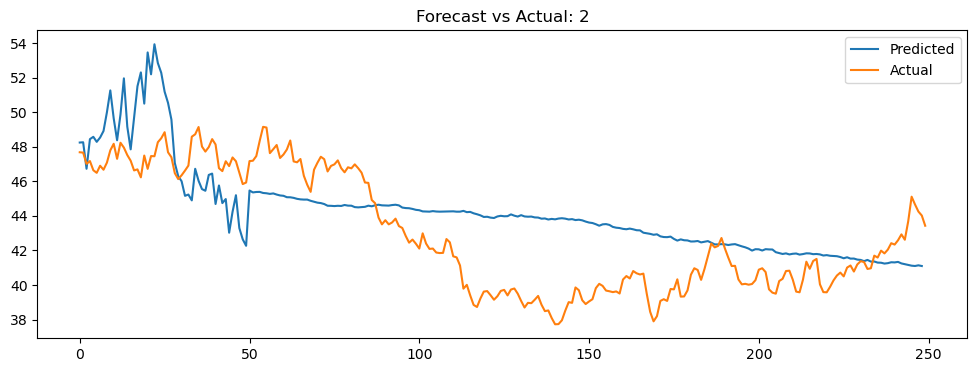

In [ ]:
# Check predictions vs test 

#initialise shape
forecast_prices = forecast_returns * 0
forecast_prices.iloc[0,:] = train_prices.iloc[-1,:] * np.exp(forecast_returns.iloc[0,:])

for i in range(1,len(forecast_prices)):
    forecast_prices.iloc[i,:] = forecast_prices.iloc[i-1,:] * np.exp(forecast_returns.iloc[i,:])

asset = 2

plt.figure(figsize=(12, 4))
plt.plot(forecast_prices[asset].values,label='Predicted')
plt.plot(test_prices[asset].values,label='Actual')
plt.title(f"Forecast vs Actual: {asset}")
plt.legend()
plt.show()


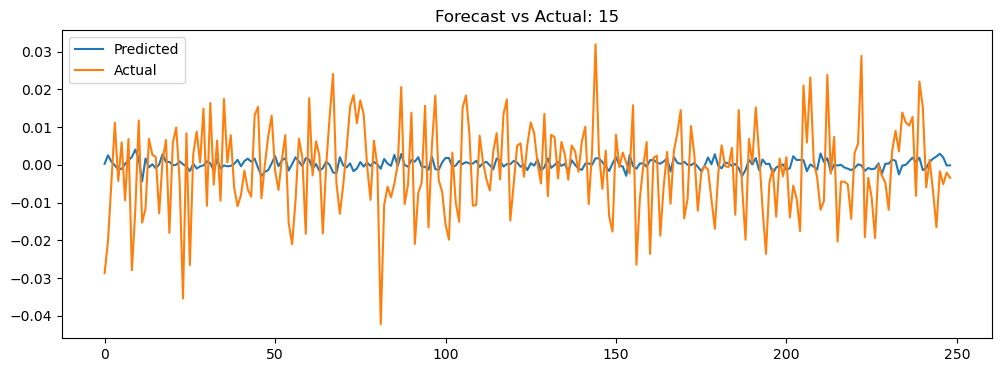

In [ ]:
asset = 3

plt.figure(figsize=(12, 4))
plt.plot(forecast_returns[asset].values,label='Predicted')
plt.plot(test_returns[asset].values,label='Actual')
plt.title(f"Forecast vs Actual: {asset_index}")
plt.legend()
plt.show()

In [ ]:
test_prices

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,34.15,58.00,47.68,36.76,51.24,27.38,23.96,55.02,36.87,74.47,32.35,61.19,37.76,57.86,53.54,54.93,48.37,34.80,42.66,29.20,43.61,42.47,83.49,105.50,74.85,33.65,45.13,27.20,51.65,33.51,24.99,74.21,38.50,11.30,55.98,40.37,60.89,42.66,71.45,69.17,76.85,44.21,35.24,29.37,84.11,29.06,69.58,17.42,81.80,32.13
1,34.45,58.00,47.66,35.72,51.24,27.44,24.49,55.77,35.90,74.03,32.09,60.44,38.25,58.05,53.07,55.03,48.54,34.92,41.30,29.18,44.02,42.84,84.07,106.21,75.18,34.00,45.29,27.43,50.61,33.51,25.15,74.42,38.74,11.42,56.23,40.16,61.00,42.84,71.05,68.81,77.26,44.75,35.72,29.40,83.78,29.18,69.38,17.14,81.38,32.38
2,34.57,58.24,47.01,35.01,50.77,27.09,24.46,56.31,36.50,74.83,32.29,61.16,38.39,58.76,52.48,55.18,48.98,34.59,41.43,29.19,44.27,42.89,83.66,107.92,75.30,33.95,45.60,27.93,49.90,33.55,25.30,75.84,39.76,11.53,56.24,40.26,61.32,43.14,71.16,69.29,77.80,43.89,35.34,29.01,84.03,29.37,68.75,17.34,81.09,32.16
3,34.60,58.75,47.17,34.85,50.86,27.09,24.30,56.53,36.31,74.18,32.88,61.49,38.38,59.41,51.70,55.87,48.51,34.08,41.54,29.31,44.05,42.77,83.91,107.67,75.96,34.76,45.22,28.27,50.80,33.41,25.71,76.37,40.23,11.55,56.47,39.88,60.97,44.09,71.49,69.25,77.40,44.04,34.94,28.98,83.59,29.13,68.44,17.63,79.99,32.02
4,34.78,59.10,46.64,35.24,51.08,27.11,25.08,57.01,36.14,73.64,32.70,61.85,38.06,59.03,52.06,55.61,48.78,34.15,41.65,29.17,43.65,41.85,84.97,106.74,75.65,34.83,45.54,27.72,50.84,33.00,25.72,76.27,39.98,11.90,56.15,40.22,61.87,44.31,71.94,69.68,77.75,44.24,35.51,29.06,84.30,29.06,68.42,17.54,80.64,31.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,36.49,51.34,45.11,29.37,39.73,28.69,17.89,47.71,40.70,58.56,28.95,57.34,35.15,51.09,56.00,51.85,42.73,40.12,37.85,29.28,41.15,39.91,95.22,97.95,82.28,36.64,48.66,25.51,61.33,39.13,24.05,73.26,45.10,10.84,50.61,40.58,72.26,47.66,68.70,64.93,75.13,46.74,39.54,32.21,75.55,30.62,85.74,16.13,81.57,31.53
246,36.30,50.95,44.66,29.32,39.85,28.59,17.84,47.31,40.32,58.05,29.56,56.14,35.50,51.08,55.53,51.60,43.34,40.43,37.76,29.01,41.33,39.48,96.30,97.18,82.67,36.55,48.84,25.25,60.37,38.93,23.89,73.30,45.22,10.87,51.43,40.37,71.94,48.45,68.17,64.55,75.06,47.19,39.32,32.92,75.97,30.87,85.88,15.91,80.50,31.65
247,36.58,50.80,44.25,29.17,40.01,28.97,17.76,47.01,39.97,57.61,29.30,56.97,35.49,51.15,55.14,51.47,44.20,39.90,37.95,29.13,41.15,39.72,99.24,97.25,82.74,35.86,49.28,24.96,59.97,38.51,23.94,73.40,45.80,10.69,50.90,40.20,72.17,47.84,67.77,64.60,74.97,47.52,39.58,33.31,76.05,30.83,86.15,15.81,80.93,31.83
248,36.43,51.19,44.02,29.11,40.01,28.54,17.69,45.68,39.86,59.06,29.51,58.66,34.92,51.51,54.87,51.65,44.04,39.64,38.35,29.20,41.22,39.44,97.12,95.79,83.21,35.94,50.07,24.59,59.32,38.07,24.09,72.85,46.42,10.84,50.73,40.48,72.16,47.64,67.79,65.03,75.36,48.15,39.94,32.95,75.38,30.81,86.42,15.75,80.80,31.78


In [ ]:
def lagged_corr(series1, series2, lag=1):
    """Compute correlation between series1 and lagged version of series2."""
    if lag > 0:
        return series1[lag:].corr(series2[:-lag])
    elif lag < 0:
        return series1[:lag].corr(series2[-lag:])
    else:
        return series1.corr(series2)

assets = returns.columns
best_corr = 0
best_pair = (None, None)
best_lag = 0

max_lag = 337  # how far forward/backward to search

for asset1 in assets:
    for asset2 in assets:
        if asset1 >= asset2:
            continue
        for lag in range(-max_lag, max_lag + 1):
            corr = lagged_corr(returns[asset1], returns[asset2], lag)
            if abs(corr) > abs(best_corr):
                best_corr = corr
                best_pair = (asset1, asset2)
                best_lag = lag

print(f"Highest lagged correlation: {best_corr:.4f}")
print(f"Pair: {best_pair[0]} (leads) → {best_pair[1]} (lags by {best_lag} days)")


Highest lagged correlation: 0.3835
Pair: 29 (leads) → 48 (lags by -336 days)


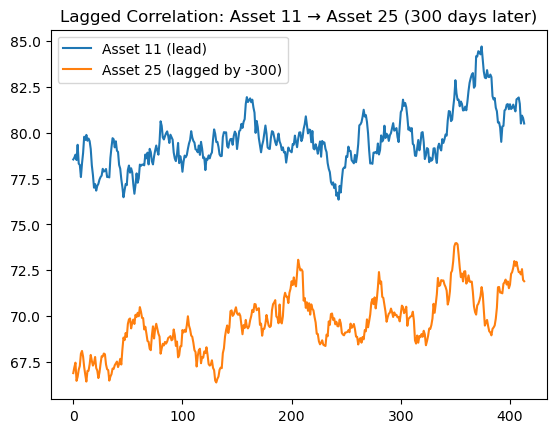

In [ ]:
#Highest lagged correlation: 0.3762
#Pair: 29 (leads) → 48 (lags by -335 days)

lead = prices[48][336:].reset_index(drop=True)
lag = prices[29][:-336].reset_index(drop=True) + 40 # shift forward

plt.plot(lead, label="Asset 11 (lead)")
plt.plot(lag, label="Asset 25 (lagged by -300)")
plt.legend()
plt.title("Lagged Correlation: Asset 11 → Asset 25 (300 days later)")
plt.show()

In [ ]:
returns.columns

RangeIndex(start=0, stop=50, step=1)